<a href="https://colab.research.google.com/github/brayla-oya/DDDS-My-Projects/blob/main/Project_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition
Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

This project predicts whether a future customer will make a transaction based on the anonymized data. Binary classification because the target is either 0 or 1. A successful transaction is represented as 1 & no transcation is represented as 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

base_path = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/"
train_path = base_path + 'Transaction.train.big.csv'
test_path = base_path + 'Transaction.test.big.csv'

In [ ]:
train_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'

In [ ]:
test_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.test.big.csv'

## Data Collection

In [ ]:
# Look at first 5 rows
train_orig = pd.read_csv(train_path)
train_orig.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Look at last 5 rows
train_orig.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049999,1049999,train_1049999,0.0,2.1828,12.3805,17.5654,NaN,8.1795,NaN,NaN,...,NaN,-12.1108,NaN,10.7608,NaN,NaN,NaN,NaN,NaN,14.1690


In [ ]:
train_orig.shape

(1050000, 104)

Data successfully loaded.

## Data Cleaning



 First, we will create a copy of our data so that if we delete the wrong information, we can revert to this copy and start over.

In [ ]:
# make a copy
train = train_orig.copy()
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_28['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['var_0'].plot(kind='hist', bins=20, title='var_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['var_1'].plot(kind='hist', bins=20, title='var_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('ID_code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='Unnamed: 0', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='target', y='var_0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='var_0', y='var_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='var_1', y='var_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['target']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ID_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='ID_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('target')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['var_0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ID_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='ID_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('var_0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['var_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ID_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='ID_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('var_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['var_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ID_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='ID_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('var_2')

from matplotlib import pyplot as plt
_df_41['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['var_0'].plot(kind='line', figsize=(8, 4), title='var_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['var_1'].plot(kind='line', figsize=(8, 4), title='var_1')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['ID_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='Unnamed: 0', y='ID_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['ID_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='target', y='ID_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['ID_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='var_0', y='ID_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['ID_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='var_1', y='ID_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# count of every unique value in the 'target' column including any missing (NaN) values.
train['target'].value_counts(dropna=False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [ ]:
# check all of the NaN values
train.isnull().sum().sum()

np.int64(97920000)

In [ ]:
# check all of the valid values
train.notna().sum().sum()

np.int64(11280000)

In [ ]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 104 columns):
 #    Column      Dtype  
---   ------      -----  
 0    Unnamed: 0  int64  
 1    ID_code     object 
 2    target      float64
 3    var_0       float64
 4    var_1       float64
 5    var_2       float64
 6    var_3       float64
 7    var_4       float64
 8    var_5       float64
 9    var_6       float64
 10   var_7       float64
 11   var_8       float64
 12   var_9       float64
 13   var_10      float64
 14   var_11      float64
 15   var_12      float64
 16   var_13      float64
 17   var_14      float64
 18   var_15      float64
 19   var_16      float64
 20   var_17      float64
 21   var_18      float64
 22   var_19      float64
 23   var_20      float64
 24   var_21      float64
 25   var_22      float64
 26   var_23      float64
 27   var_24      float64
 28   var_25      float64
 29   var_26      float64
 30   var_27      float64
 31   var_28      float64
 3

We can drop the "ID_code" & "Unnamed: 0" columns because they are just placeholders and won't affect the data if they are deleted.

In [ ]:
# columns (axis=1) dropped and changes are applied directly to the train
train.drop('ID_code', axis=1 , inplace=True)
train.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# new set of data with the two columns removed
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.476,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_16['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['var_0'].plot(kind='hist', bins=20, title='var_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['var_1'].plot(kind='hist', bins=20, title='var_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['var_2'].plot(kind='hist', bins=20, title='var_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='target', y='var_0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='var_0', y='var_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='var_1', y='var_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='var_2', y='var_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['var_0'].plot(kind='line', figsize=(8, 4), title='var_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['var_1'].plot(kind='line', figsize=(8, 4), title='var_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['var_2'].plot(kind='line', figsize=(8, 4), title='var_2')
plt.gca().spines[['top', 'right']].set_visible(False)

We still have some columns with nulls that need to be removed.

In [ ]:
train.dropna(thresh=1,axis=1,inplace=True)
train.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.476,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that the necessary columns are removed, we can see that there are still some NaNs in the rows. Those can be removed now.

In [ ]:
train.dropna(thresh=1,axis=0,inplace=True)
train.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


from matplotlib import pyplot as plt
_df_0['var_0'].plot(kind='hist', bins=20, title='var_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['var_1'].plot(kind='hist', bins=20, title='var_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['var_2'].plot(kind='hist', bins=20, title='var_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['var_4'].plot(kind='hist', bins=20, title='var_4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='var_0', y='var_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='var_1', y='var_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='var_2', y='var_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='var_4', y='var_7', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['var_0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('var_0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['var_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('var_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['var_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('var_2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['var_4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('var_4')

from matplotlib import pyplot as plt
_df_12['var_0'].plot(kind='line', figsize=(8, 4), title='var_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['var_1'].plot(kind='line', figsize=(8, 4), title='var_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['var_2'].plot(kind='line', figsize=(8, 4), title='var_2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['var_4'].plot(kind='line', figsize=(8, 4), title='var_4')
plt.gca().spines[['top', 'right']].set_visible(False)

Now we need to make sure all nulls are gone before proceeding further.

In [ ]:
# checking to make sure all nulls are gone
train.transpose().isnull().sum().sum()

np.int64(0)

In [ ]:
train_test = train.copy()

In [ ]:
# Checking to make sure we have zeros & ones.
train_test['target'].value_counts(dropna=False)

,count
target,
0.0,161960
1.0,18040


In [ ]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

## Exploratory Data Analysis

Everything in the target column is now a zero or a one, which is what we want. We can see that there are a lot more zeroes than ones. This means our data is skewed.

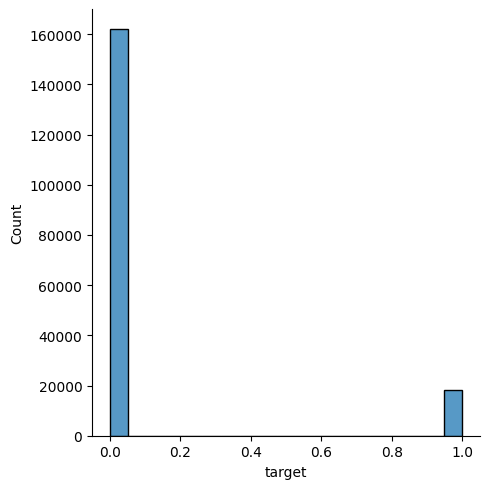

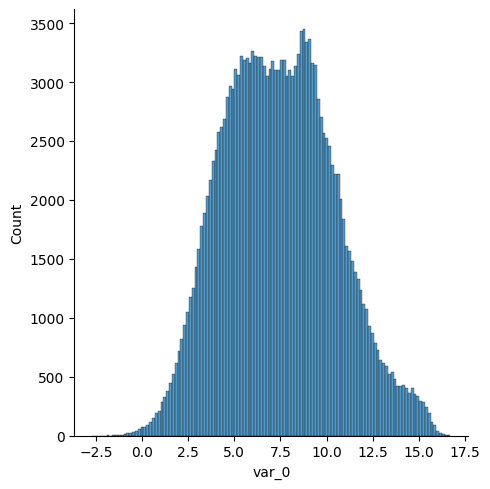

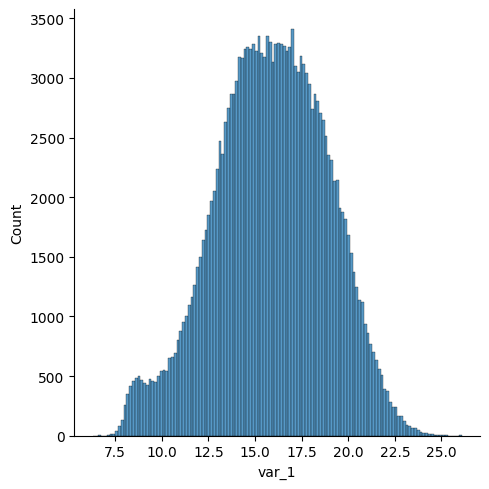

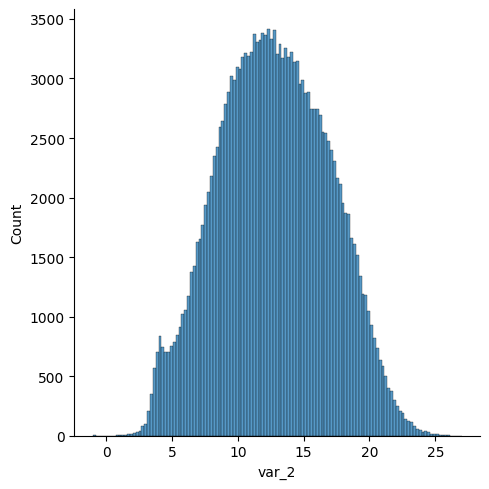

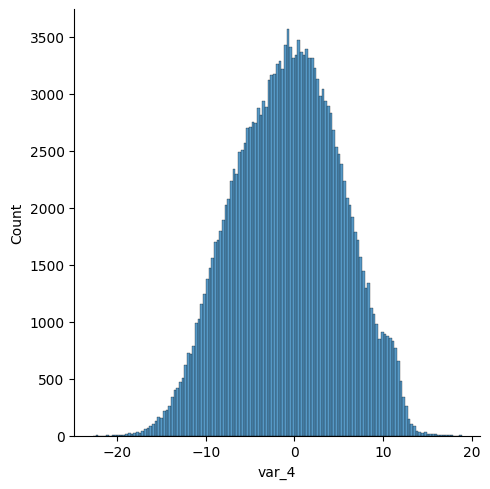

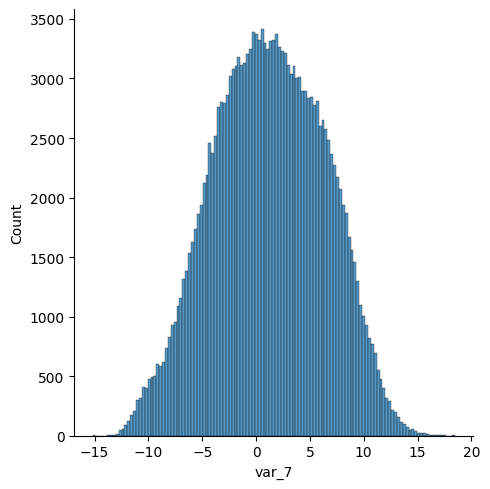

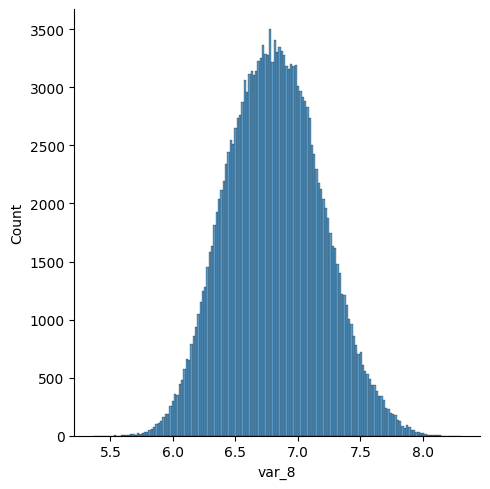

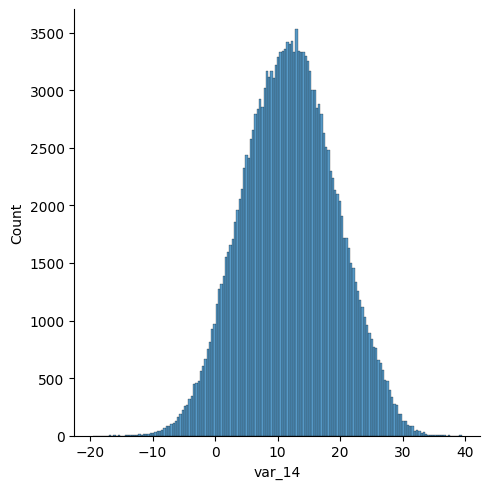

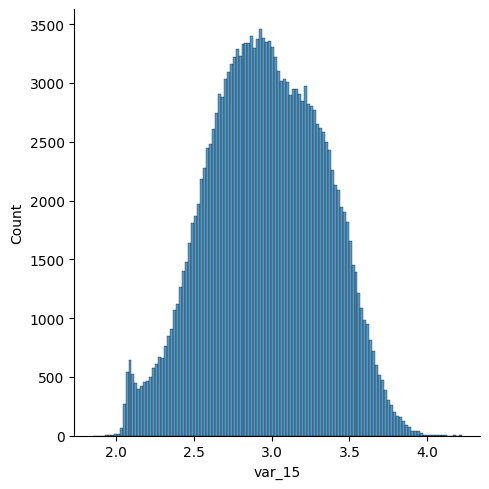

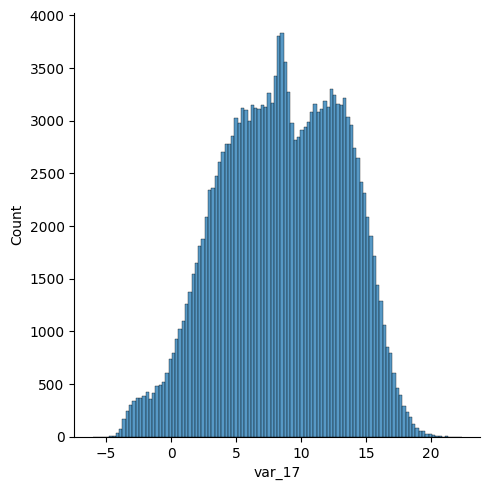

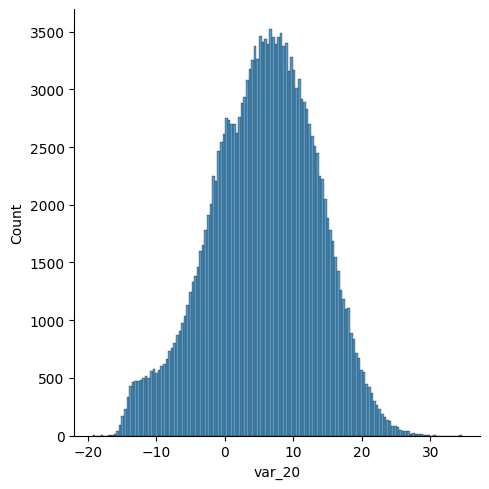

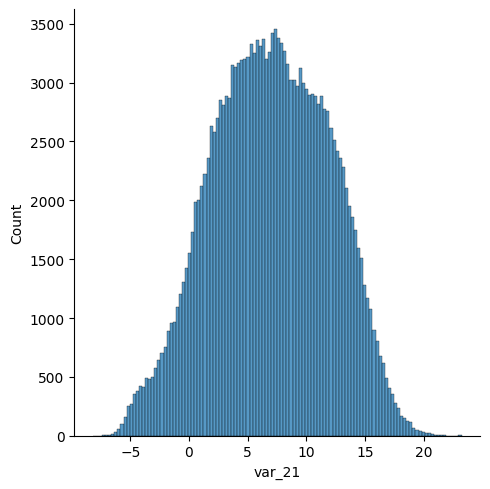

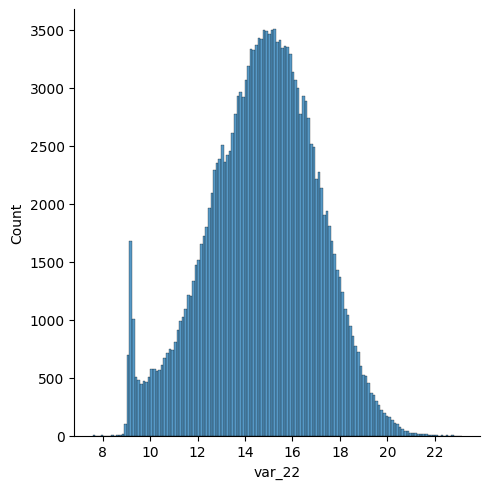

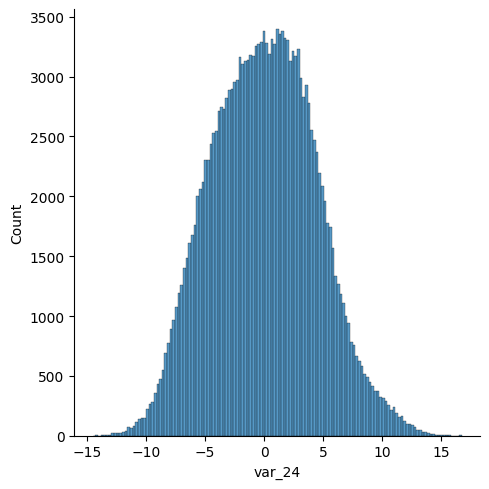

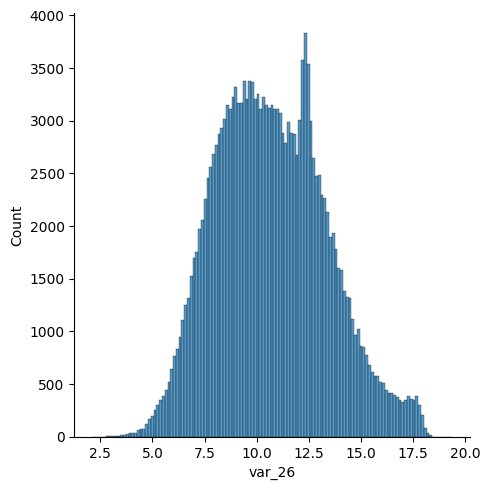

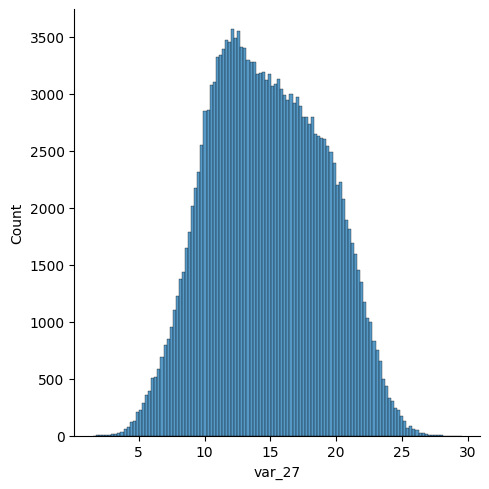

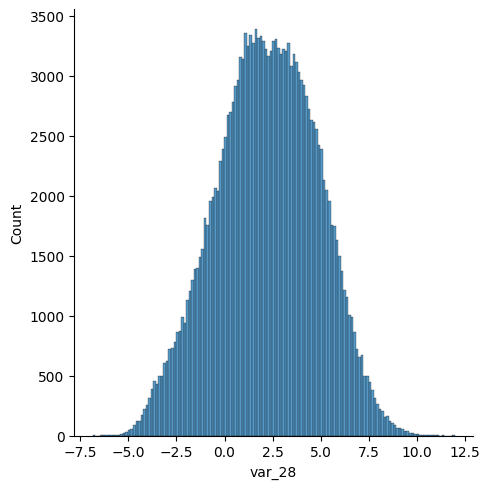

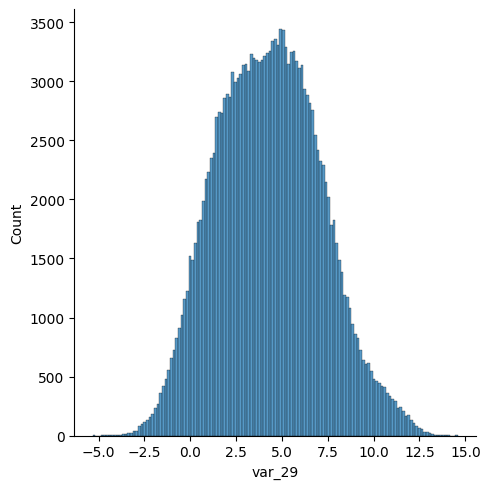

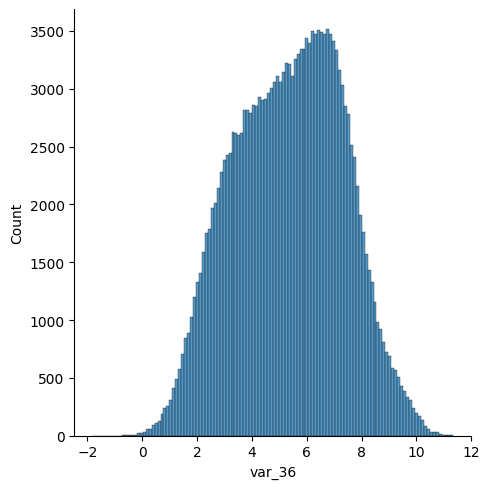

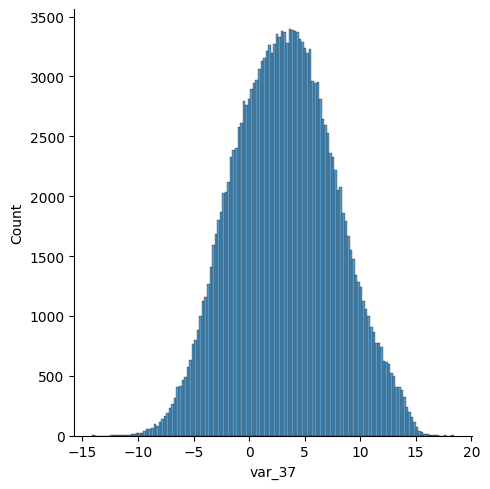

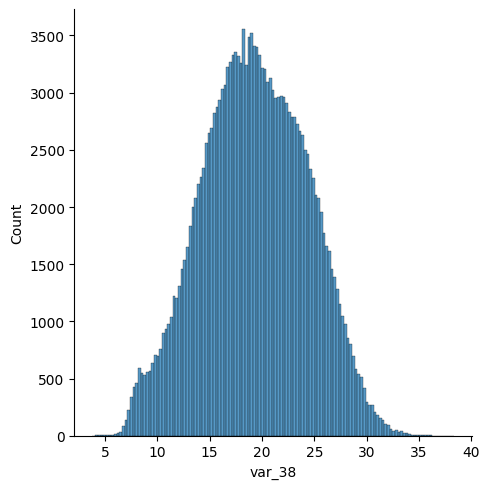

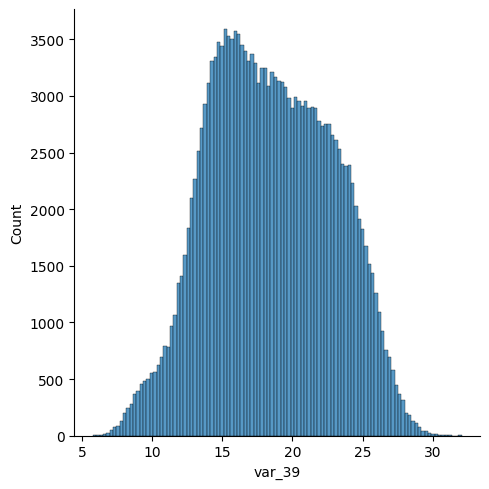

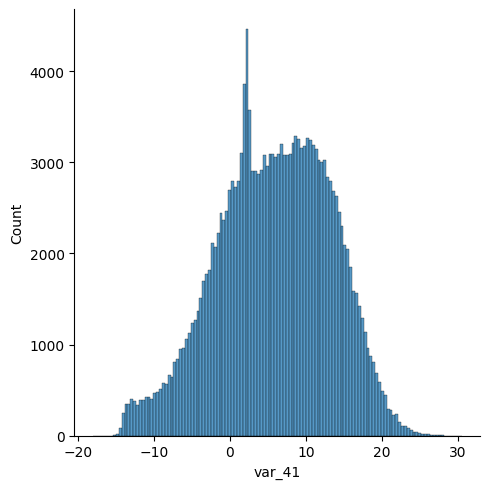

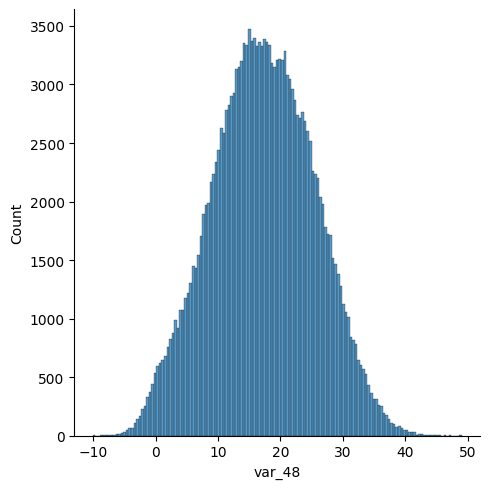

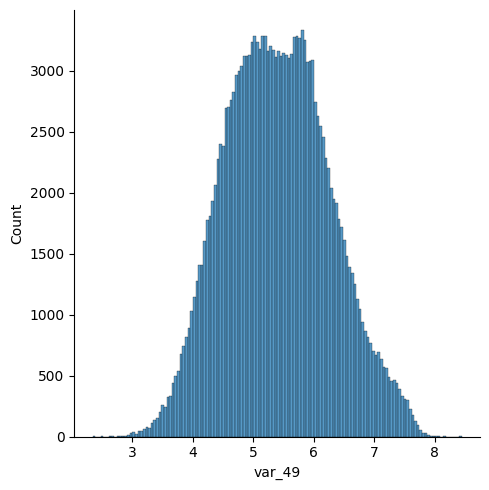

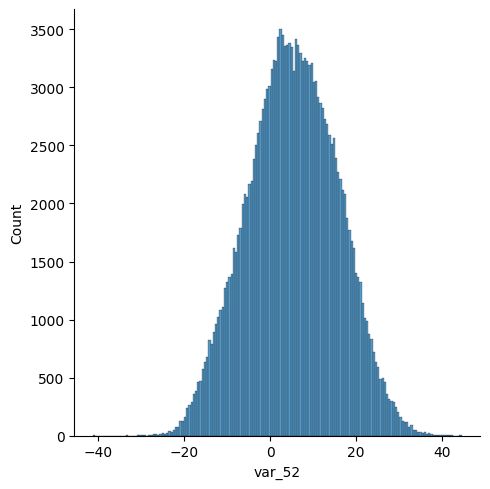

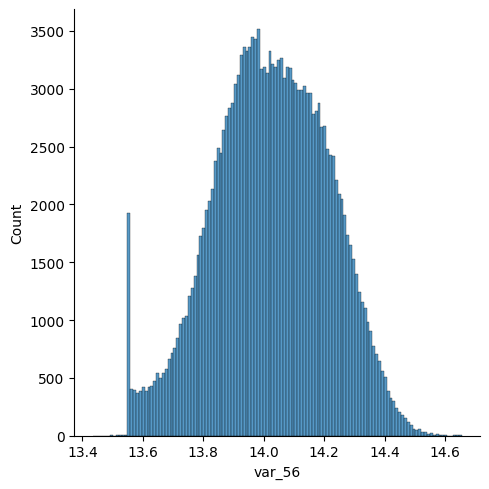

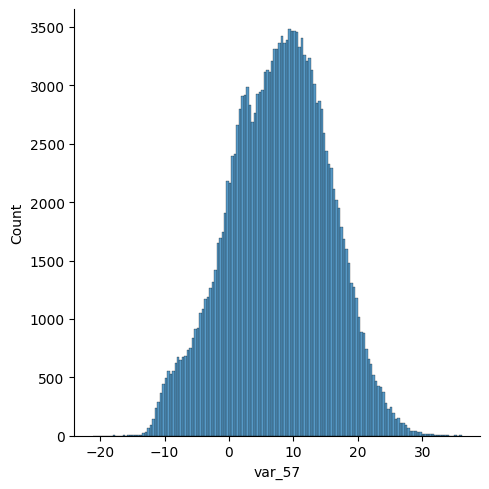

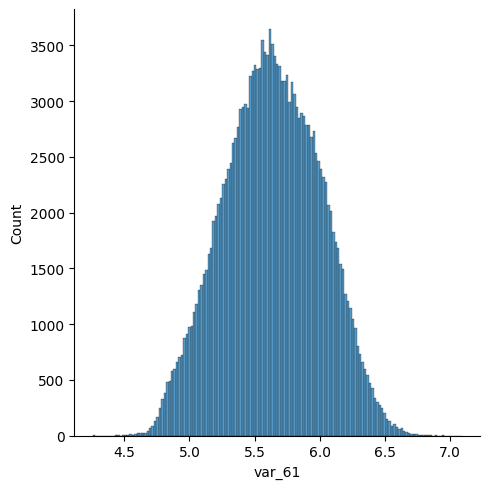

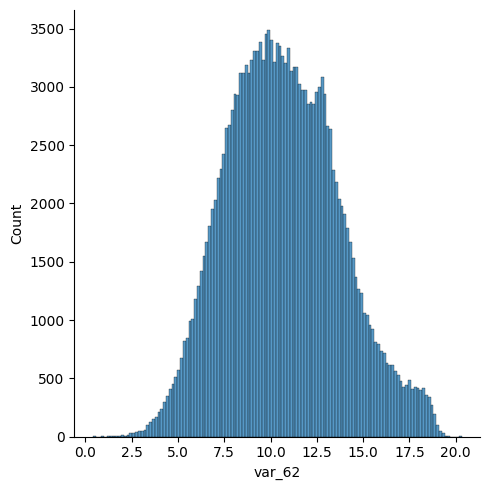

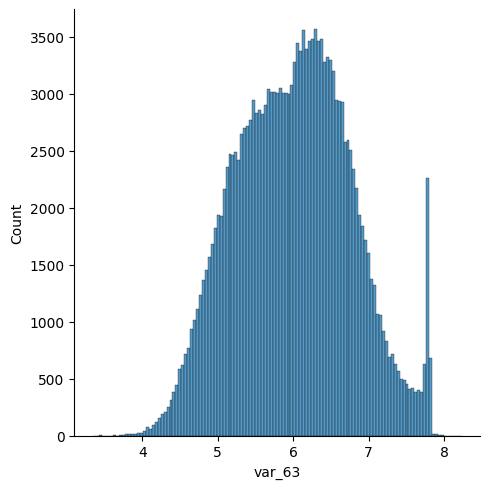

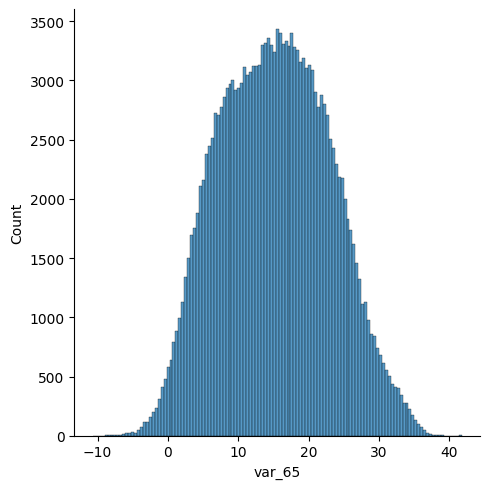

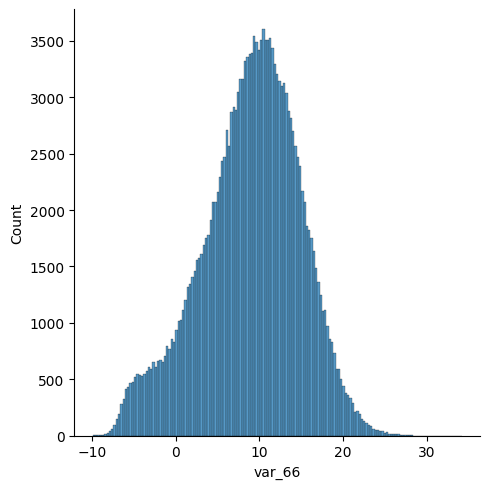

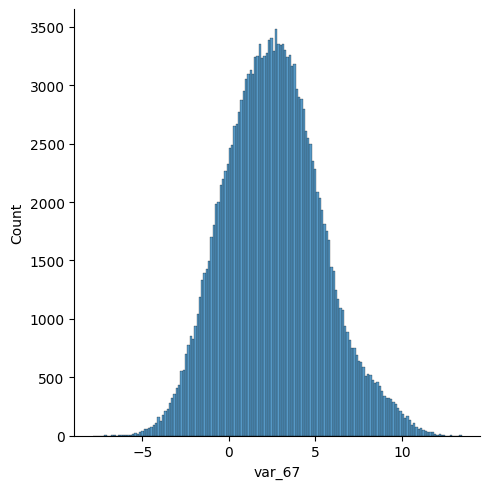

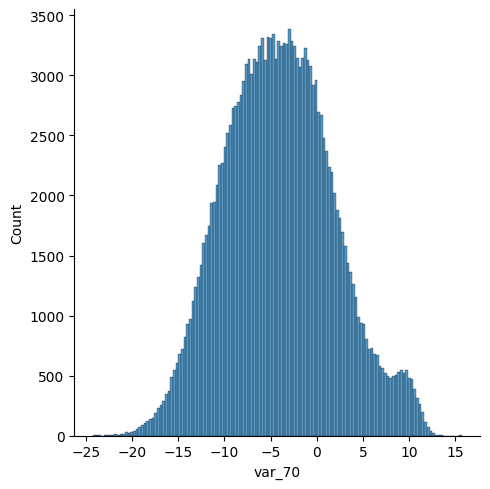

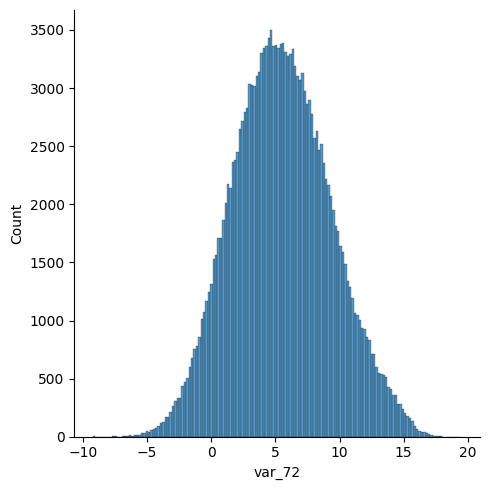

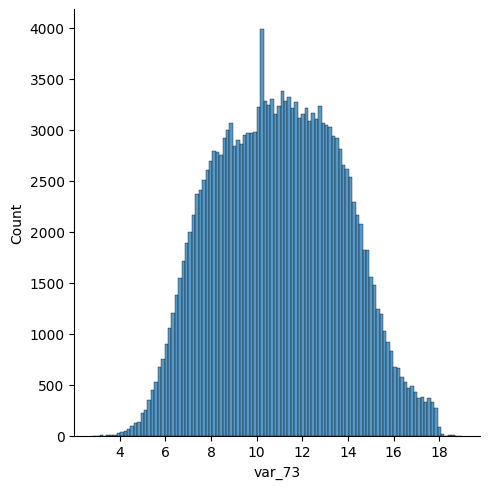

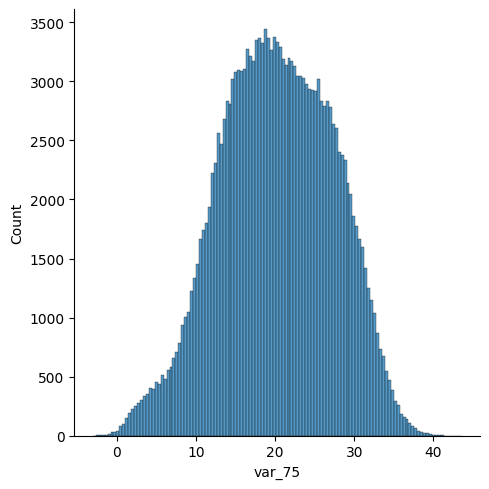

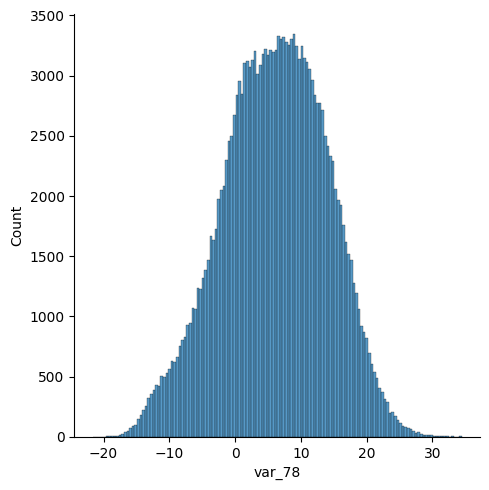

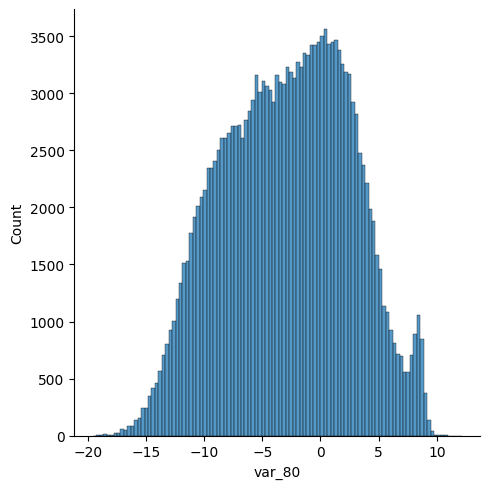

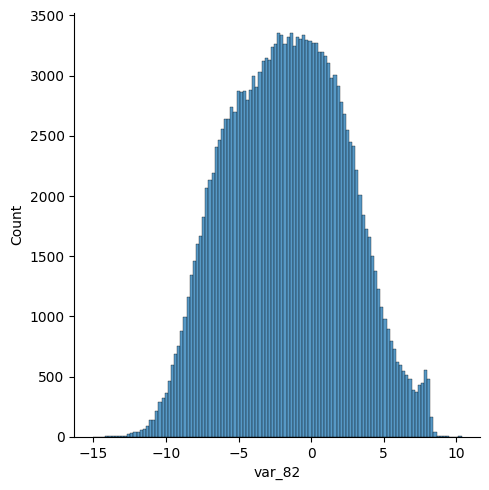

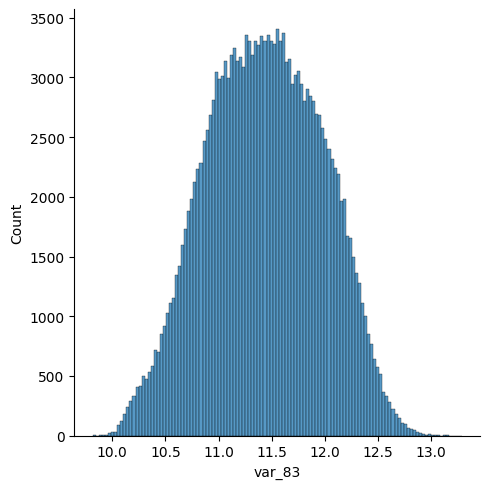

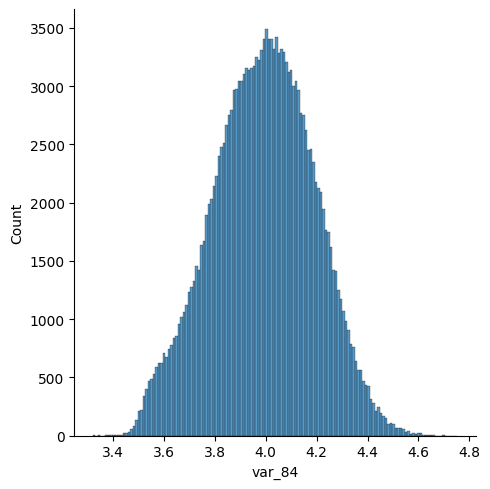

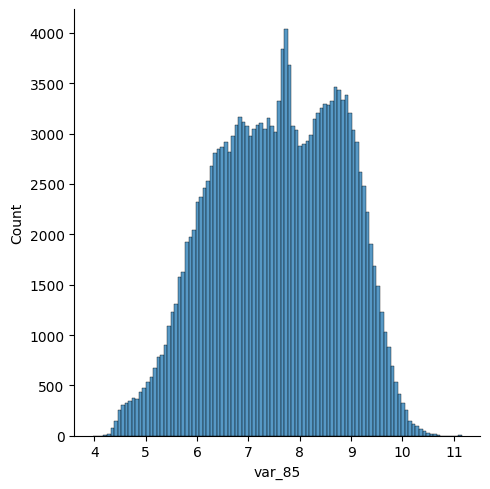

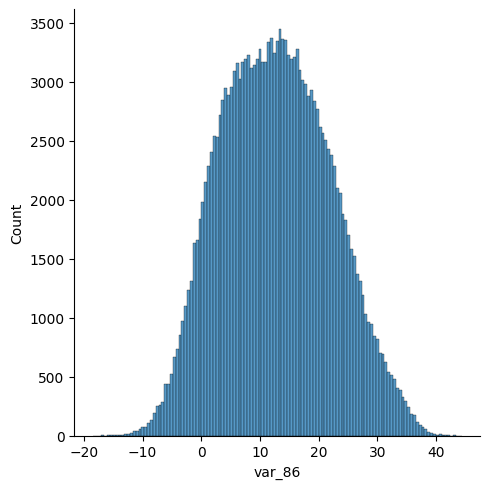

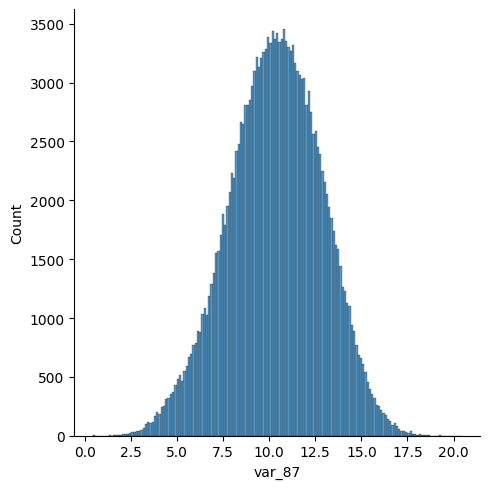

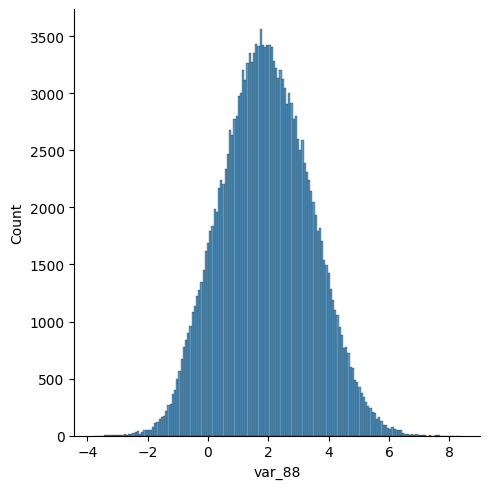

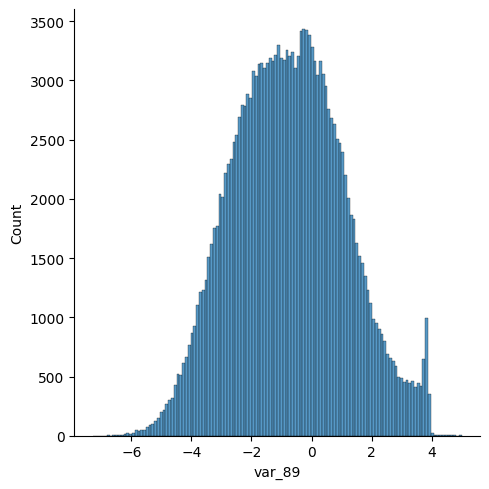

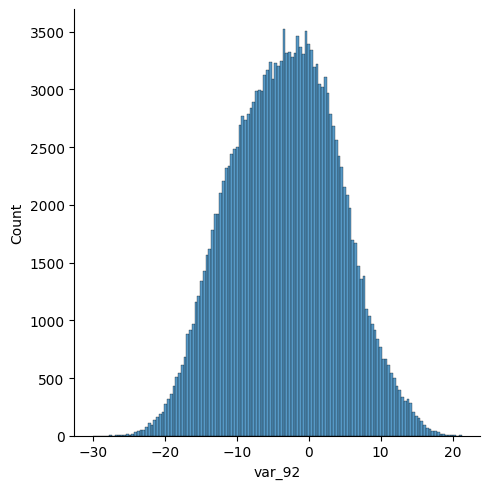

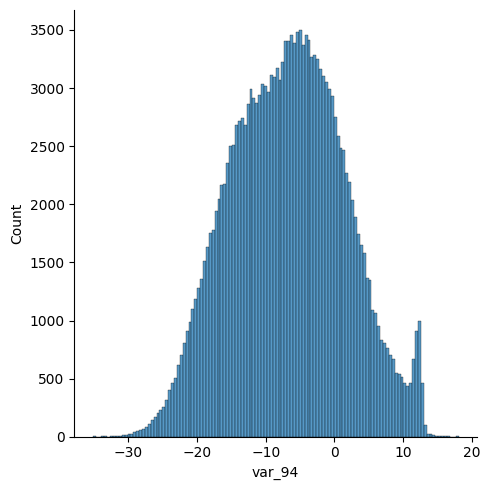

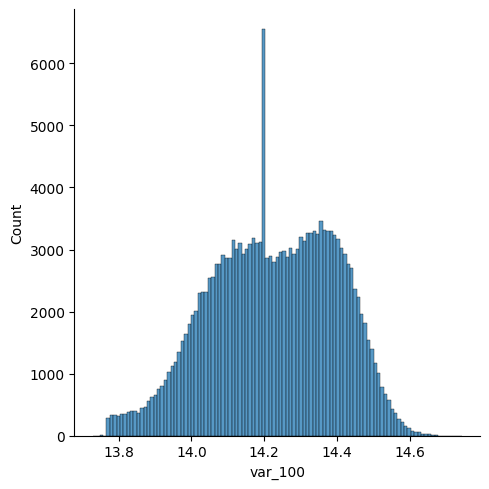

In [ ]:
for column in train_test.columns:
  sns.displot(train_test, x=column, kde=False, discrete=False)
  plt.show()

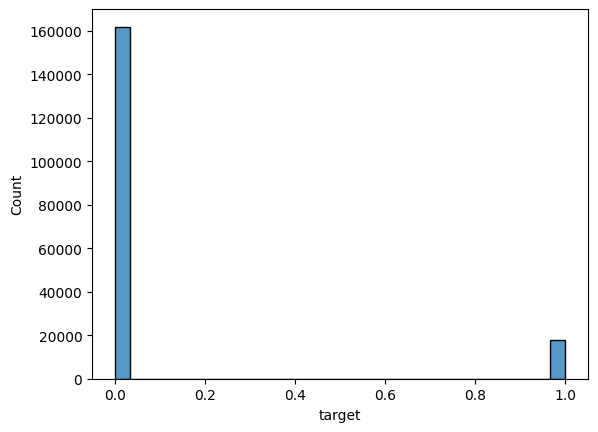

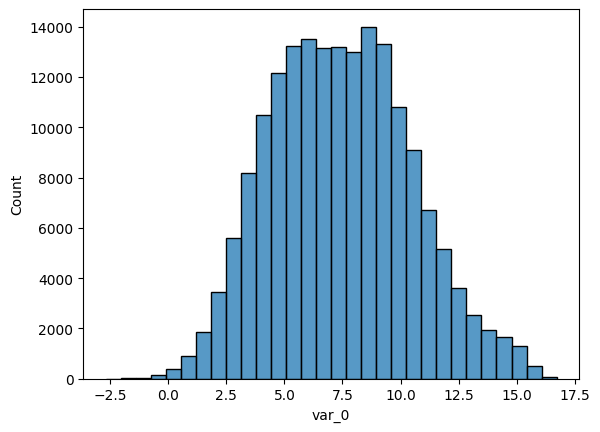

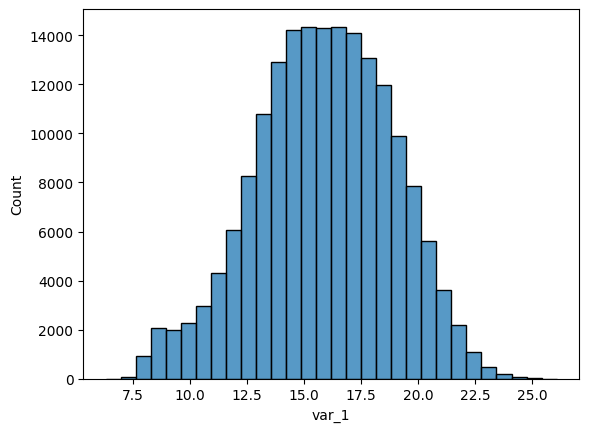

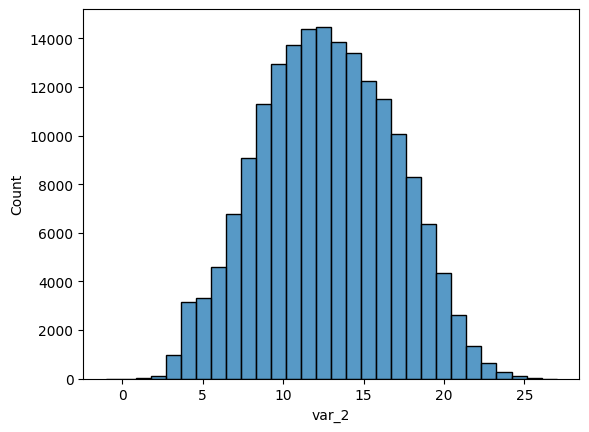

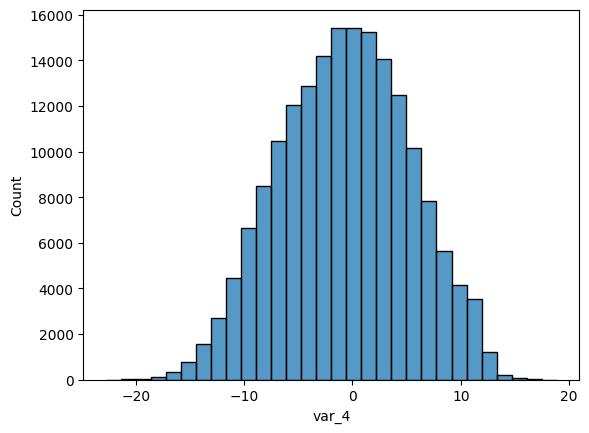

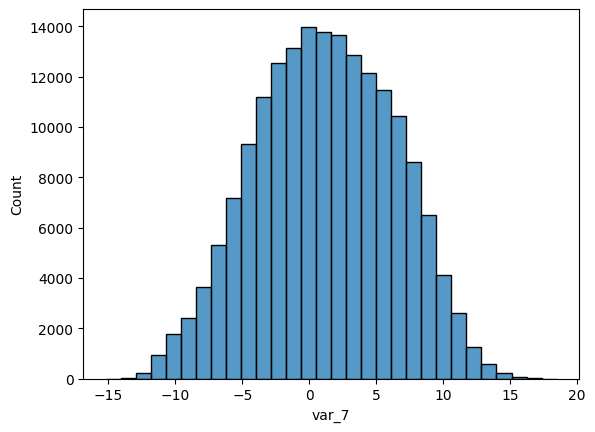

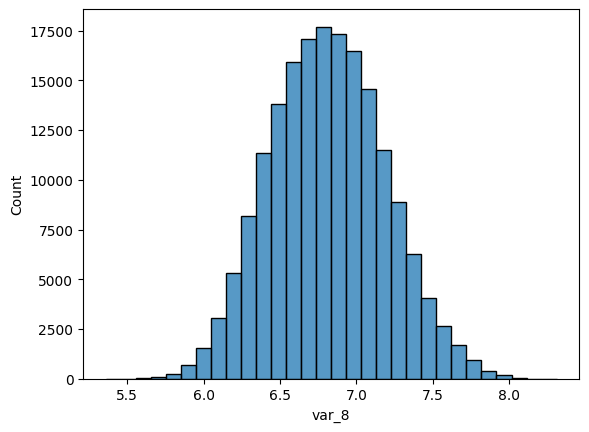

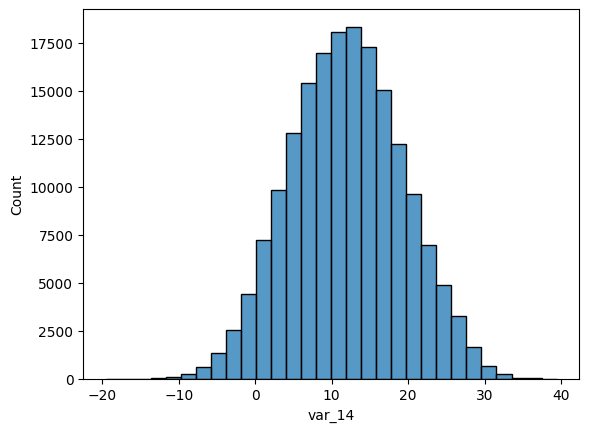

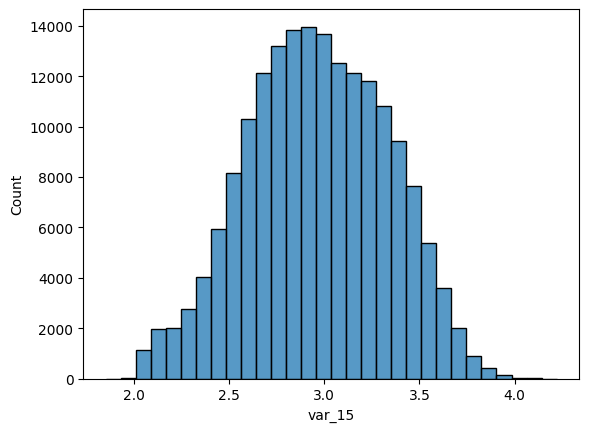

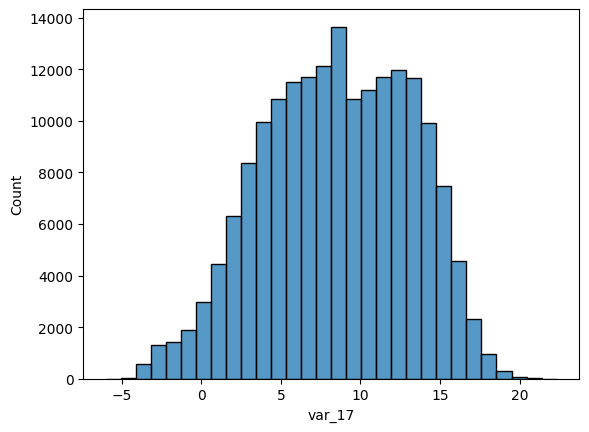

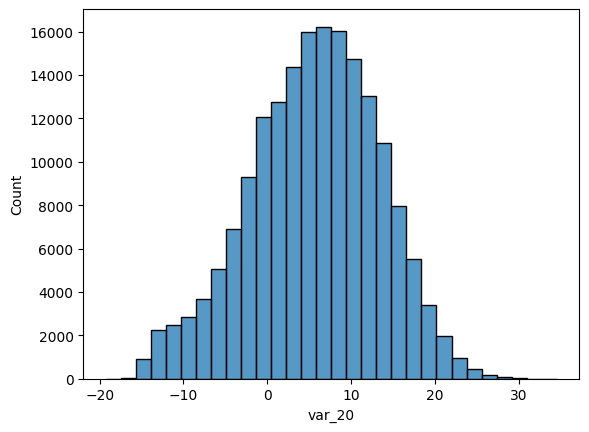

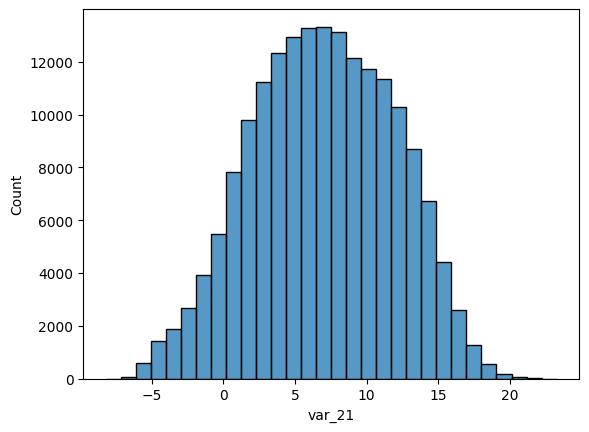

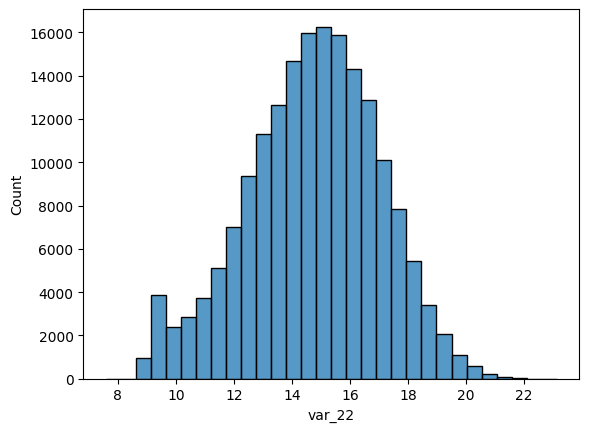

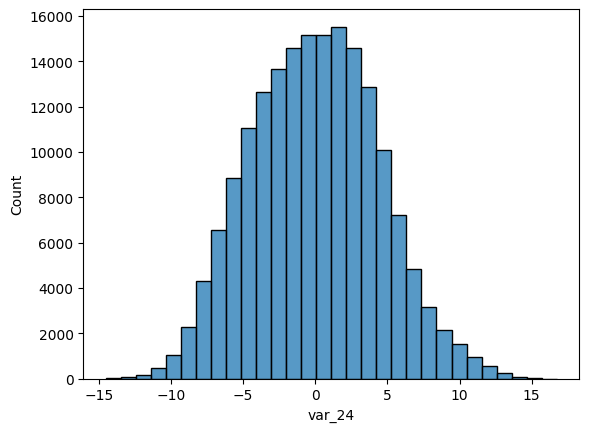

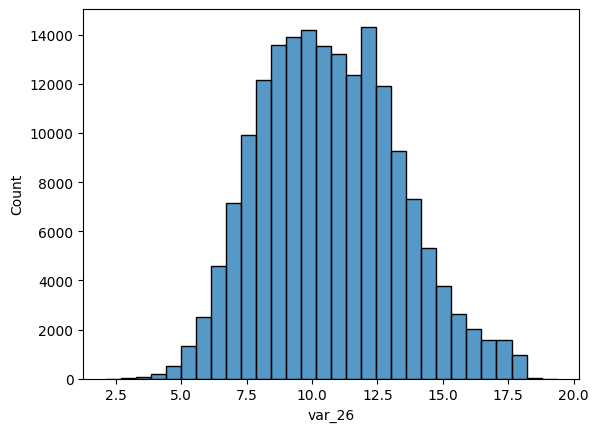

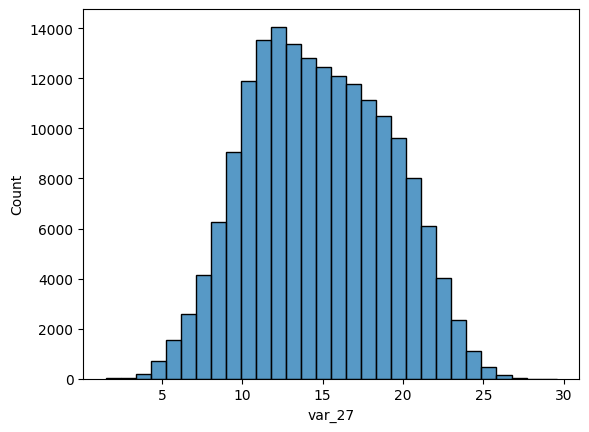

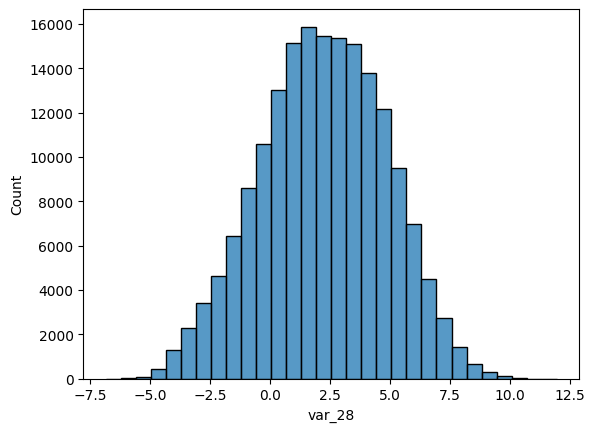

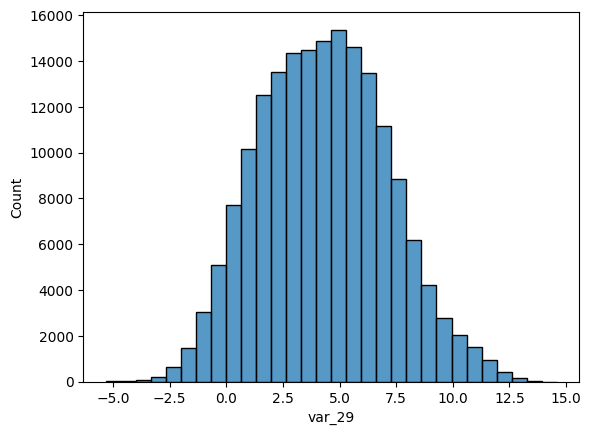

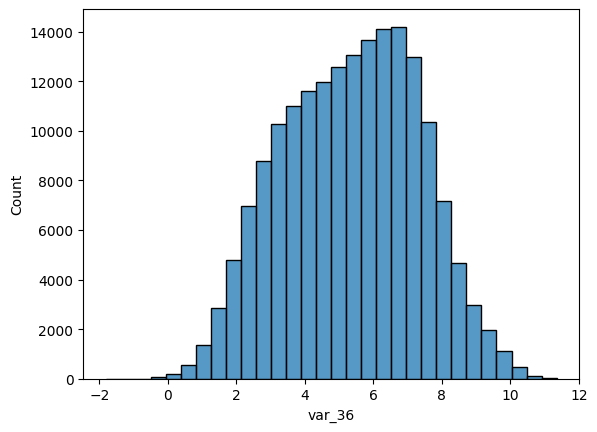

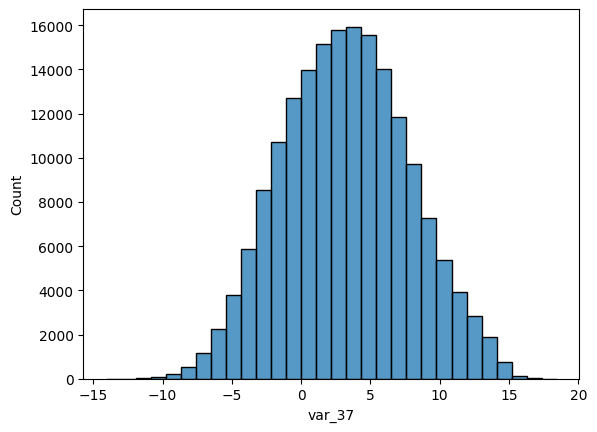

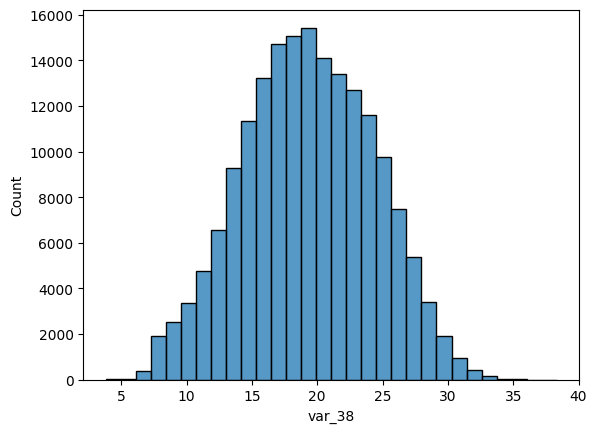

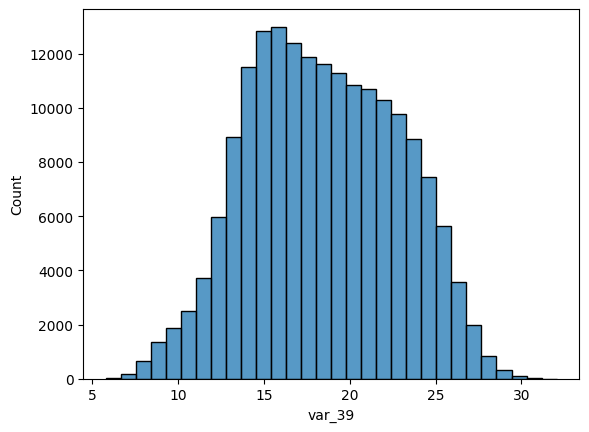

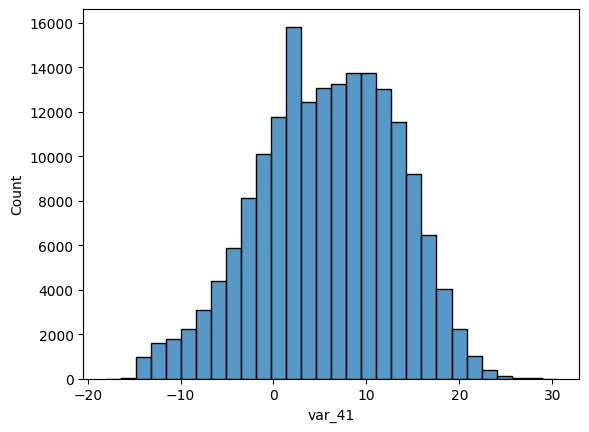

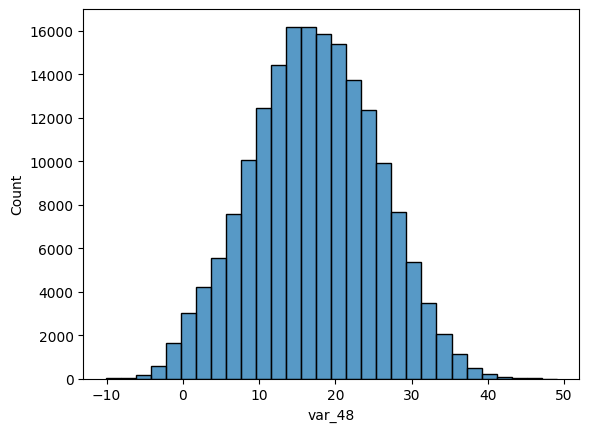

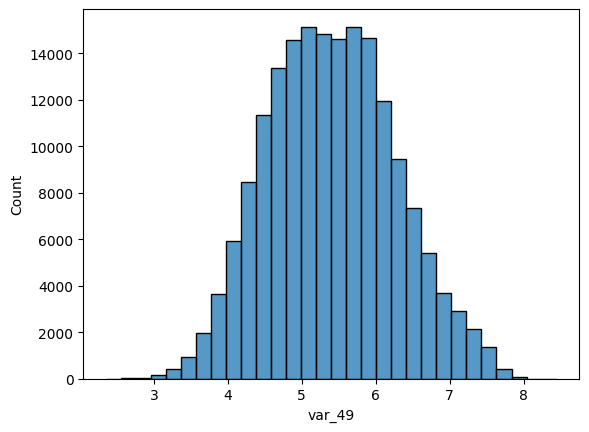

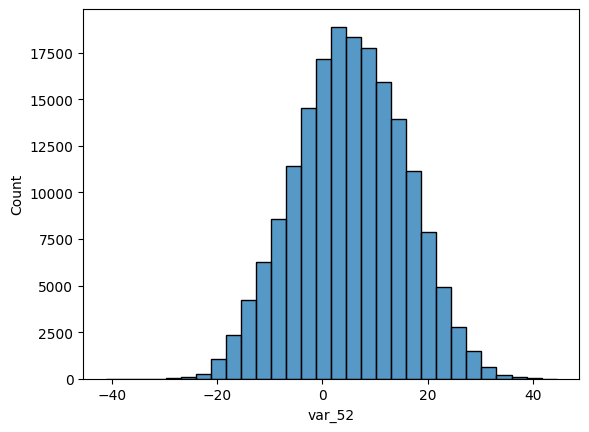

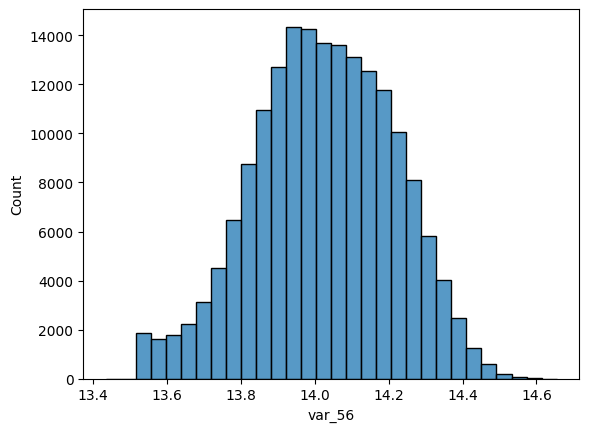

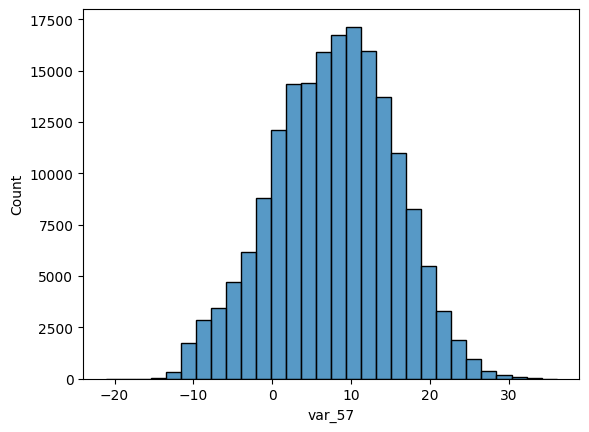

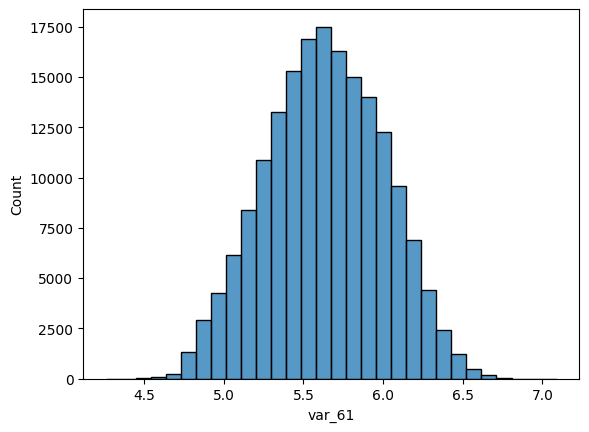

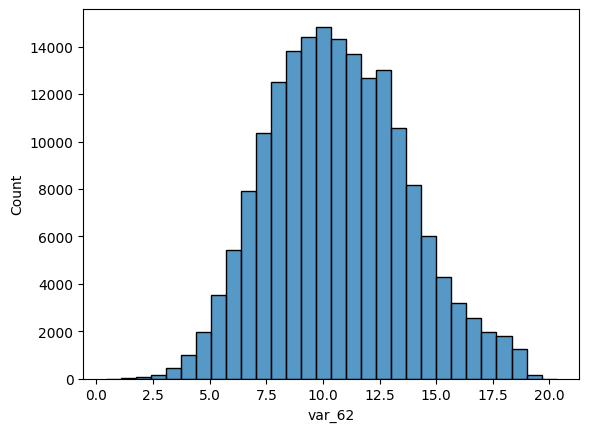

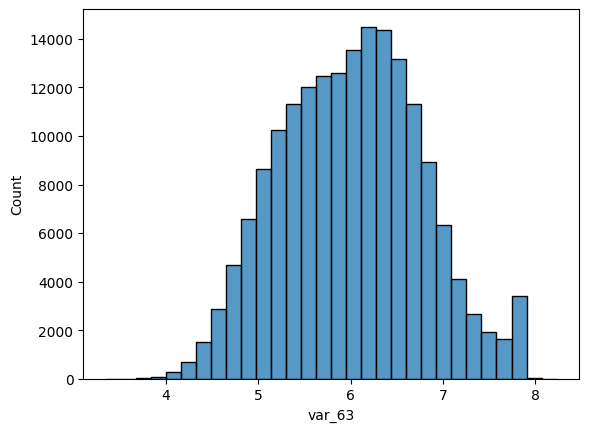

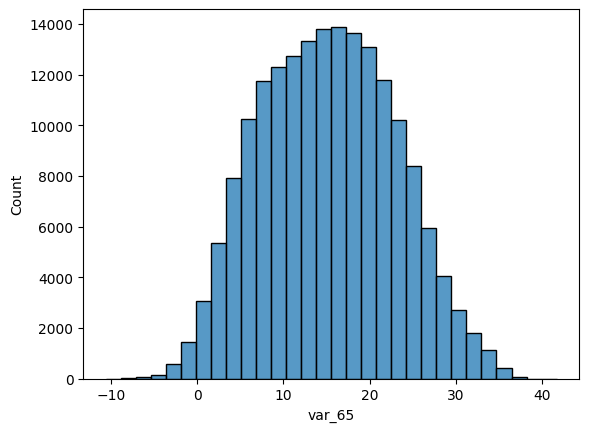

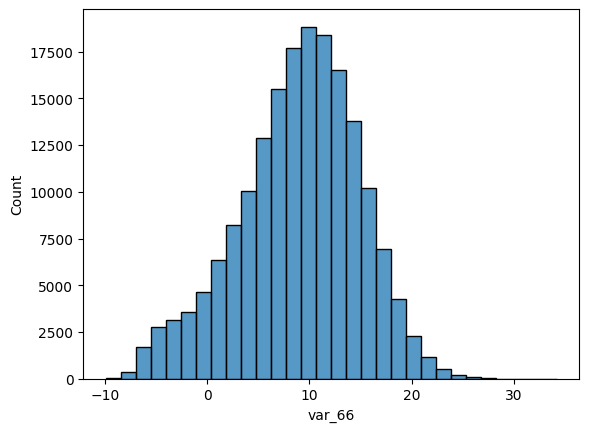

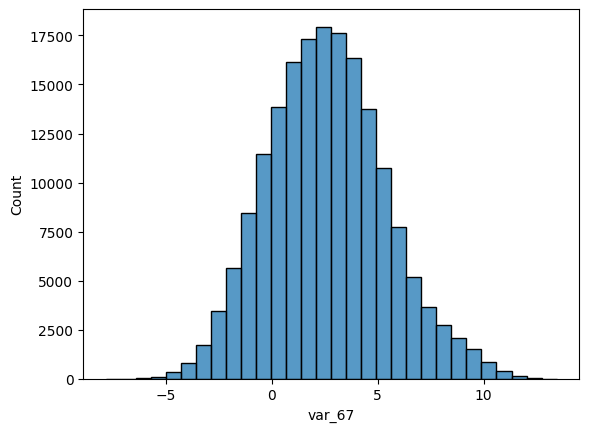

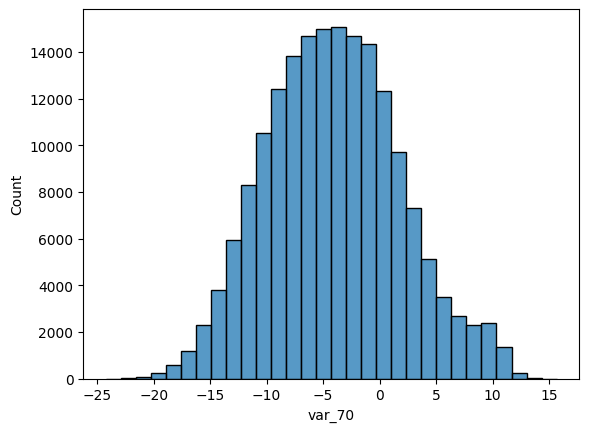

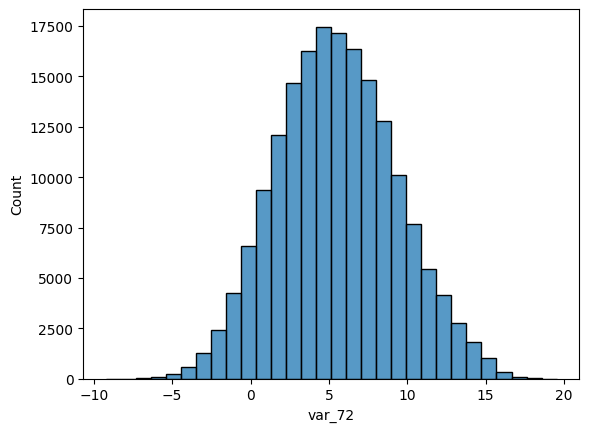

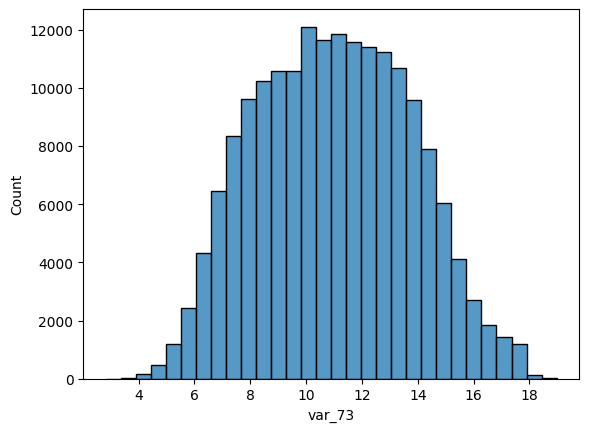

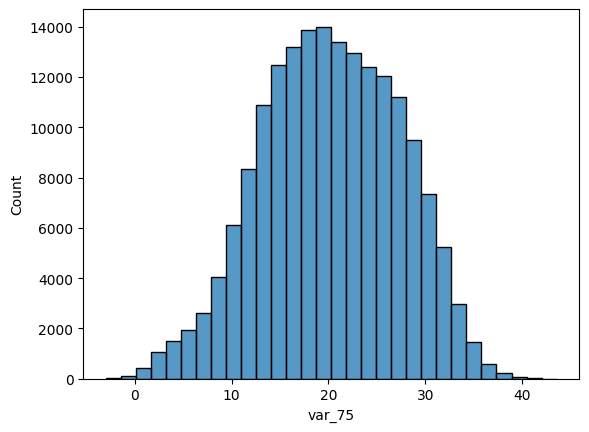

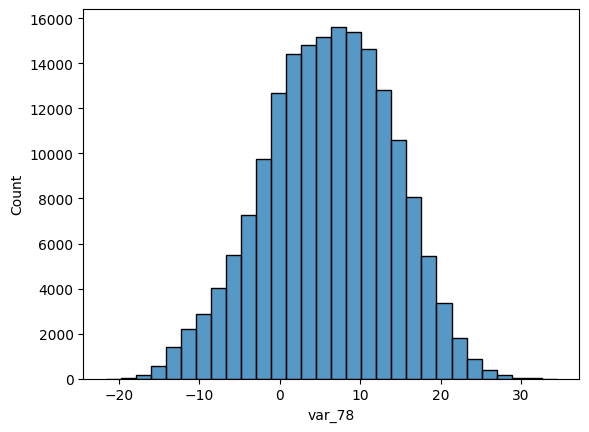

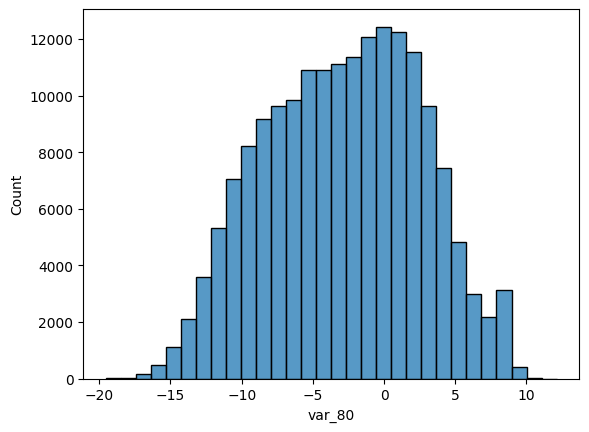

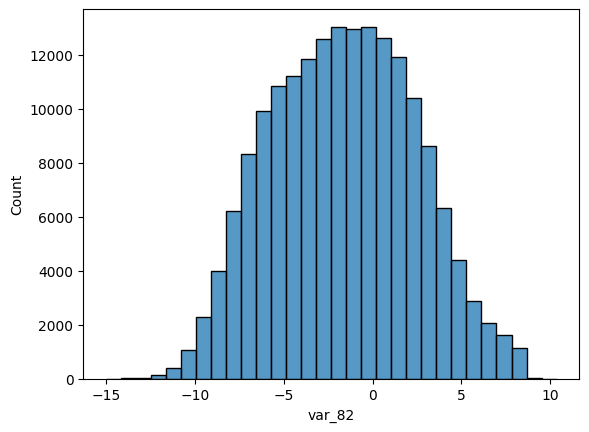

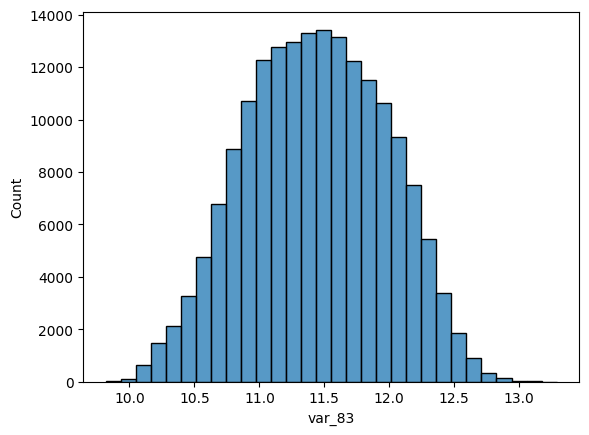

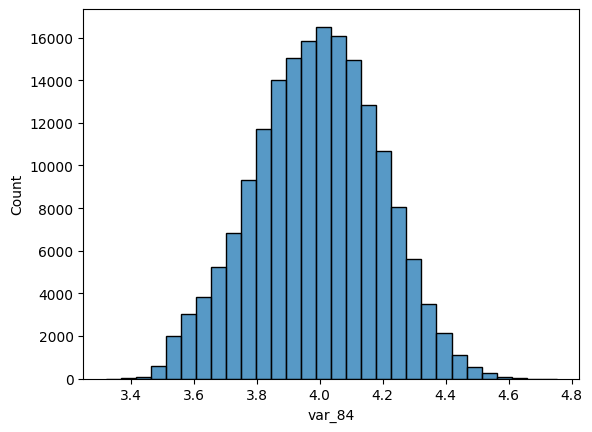

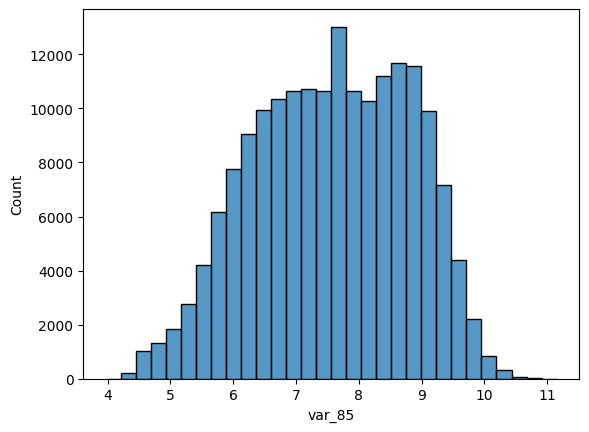

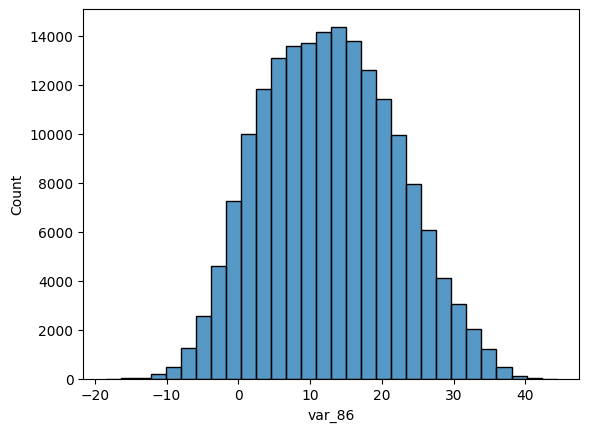

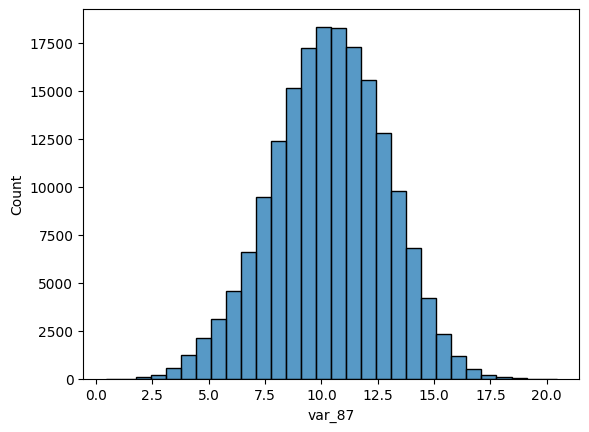

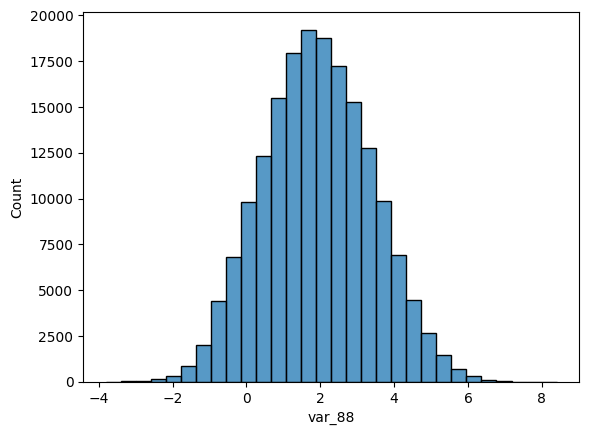

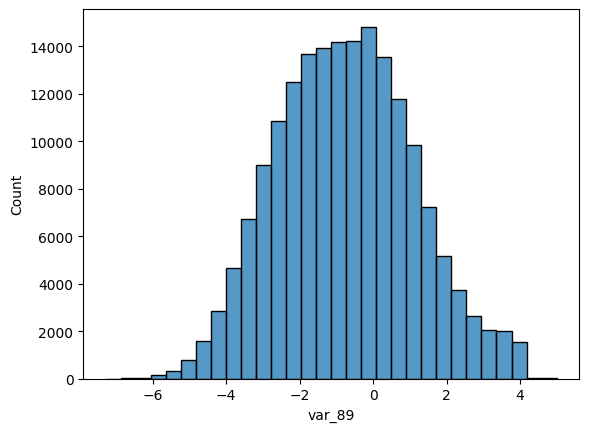

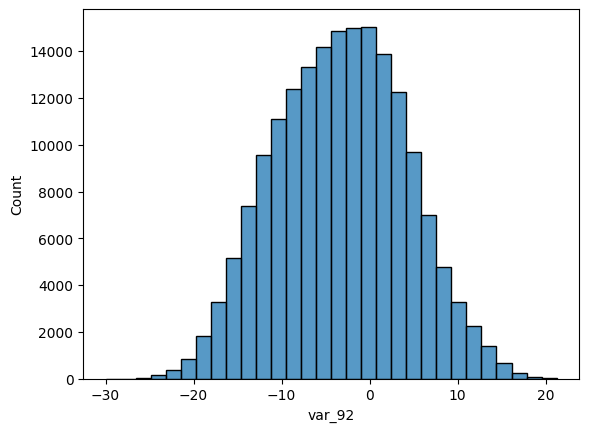

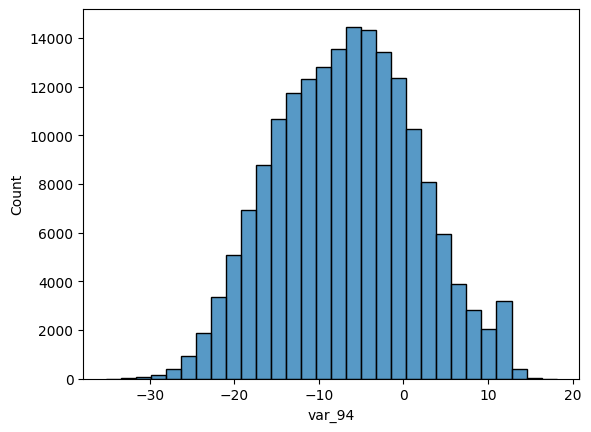

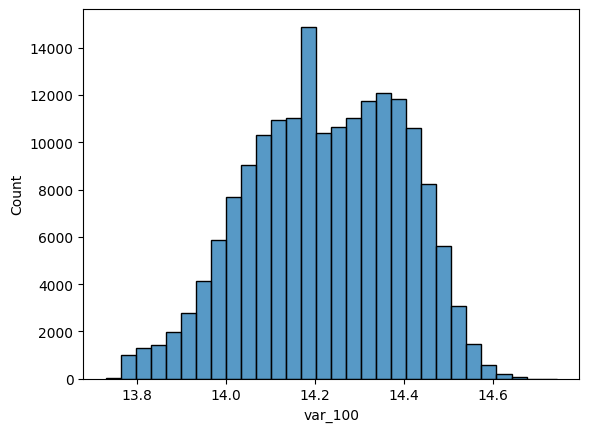

In [ ]:
for column in train_test.columns:
    plt.figure()
    sns.histplot(train_test[column], bins=30)
    plt.show()

In [ ]:
corr_matrix = train_test.corr()

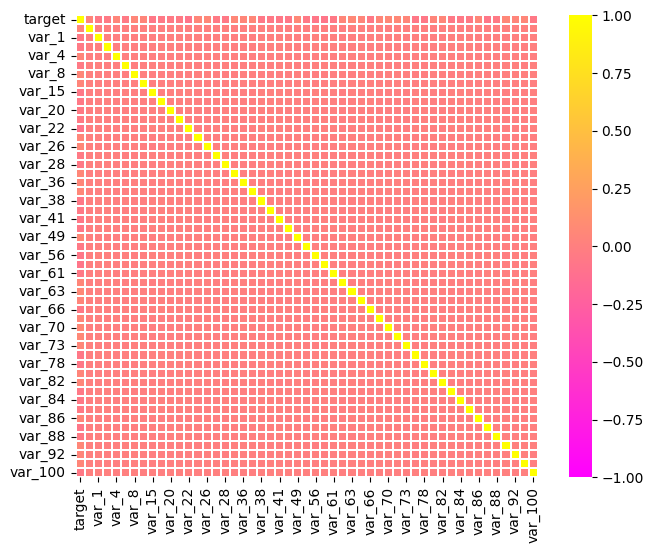

In [ ]:
corr_matrix = train_test.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="spring", square=True, linewidths=0.1, vmin=-1, vmax=1) ;
plt.savefig('correlation matrix.png')

In [ ]:
filter1 = ( train_test["target"] == 1)
train_filter1 = train_test[filter1]
filter0 = ( train_test["target"] == 0)
train_filter0 = train_test[filter0]

In [ ]:
train_filter1.shape

(18040, 51)

In [ ]:
train_filter0.shape

(161960, 51)

## Data Processing

-We are now separating the target & the vars.

In [ ]:
train_target = train_test['target']
train_target

,target
3,0.0
5,0.0
11,0.0
15,0.0
19,0.0
...,...
1049990,0.0
1049993,0.0
1049995,1.0
1049997,0.0


In [ ]:
train_vars = train_test.drop('target',axis=1)
train_vars

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,0.5878,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,6.5456,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,18.7893,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,1.1400,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,7.8002,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,3.1549,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,3.9661,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,3.8858,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,2.0014,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [ ]:
gnb = GaussianNB()

In [ ]:
# target = y
y = train['target'].copy()
# # vars = x
x = train.drop('target', axis=1, inplace=False)

I think I made this a little more difficult than it needed to be.
I could have used "x_train, x_test, y_train, & y_test" since I set them to
x & y previously.

In [ ]:
# train_test_split = splits data into train/test sets
# gnb.fit = trains the model
# gnb.predict = predicts test data labels
# vars_test != vars_pred = finds the incorrect predictions
vars_train, vars_test, target_train, target_test = train_test_split(train_vars, train_target, test_size = 0.20, random_state = 44)
gnb.fit(vars_train, target_train)
target_pred = gnb.predict(vars_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (vars_test.shape[0], (target_test != target_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3209


In [ ]:
# checks that all are dfs or series
for i in [vars_train, vars_test, target_train, target_test ]:
  print(type(i))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
for i in [vars_train, vars_test, target_train, target_test ]:
  print(i.shape)

(144000, 50)
(36000, 50)
(144000,)
(36000,)


In [ ]:
# this shows when the prediction is correct (0) &
# when prediction is wrong (+/-1000)
(target_test.to_numpy() - vars_pred)*1000

array([1000.,    0., 1000., ...,    0.,    0.,    0.])

In [ ]:
# calculates accuracy
(1-3209/36000) *100

91.08611111111111

### Cross-Validation
A cross-validation will be performed to see the average accuracy.

-Creates empty numpy array of zeros. This is filled w/ accuracy values from each loop

-num_loops is the number of times the model runs

-a new GNB model is ran fresh each time

-data is split 80/20 w/ 20 being for testing

-trains model on training data

-computes accuracy for the round

-then it returns the full array of accuracy scores

In [ ]:
def cross_validate(x, y, num_loops):

  accuracy_scores = np.zeros(num_loops)

# num_loops is the number of times the model runs
  for i in range(num_loops):
    model_split_cv = GaussianNB()
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2)
    model_split_cv.fit(x_train, y_train)
    y_split_pred = model_split_cv.predict(x_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
# 100 samples ran through
accuracy_scores = cross_validate(x, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91129


Over 100 random splits, my GNB model predicted the target correctly 91.129% of the time on average.

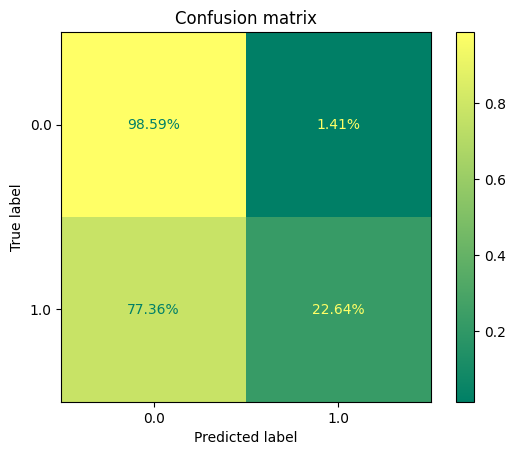

In [ ]:
# 17
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    vars_test,
    target_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'summer',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

The confusion matrix shows that most of the data leans towards transactions that didn’t go through successfully. It also shows that it is weak and detecting successful transactions. This is common problem in imbalanced sets.

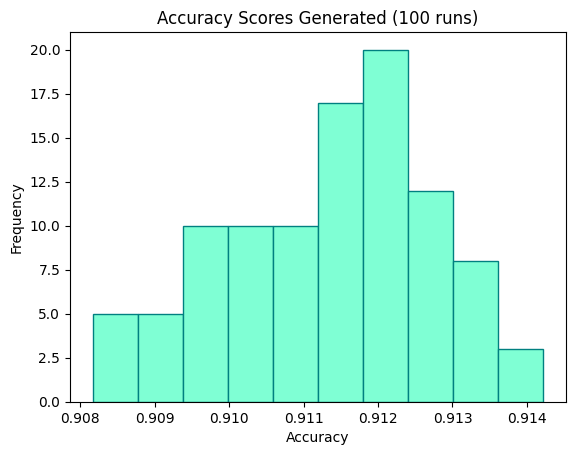

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(accuracy_scores, bins=10, color='aquamarine', edgecolor='teal') ;
plt.title('Accuracy Scores Generated (100 runs)') ;
plt.xlabel('Accuracy') ;
plt.ylabel('Frequency') ;
plt.show() ;
plt.savefig('Accuracy Scores Genterated.png') ;

### 50/50 Cross Validation

In [ ]:
success = train_test.drop('target',axis=1).copy()
fail = train['target'].copy()

In [ ]:
# make fail equal to success for 50/50 (downsample)
# n=len(success) - picks exact number of rows in the success set
failed_downsampled = fail.sample(n=len(success), random_state=44)

In [ ]:
# combining success & fail dfs
# .sample(frac=1) means shuffle 100% of rows
train_balanced = pd.concat([success, failed_downsampled]).sample(frac=1, random_state=44)

In [ ]:
x_balanced = train_balanced.drop('target', axis=1)
y_balanced = train_balanced['target']

In [ ]:
# 100 samples ran through
accuracy_scores = cross_validate(x, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91133


This is where I'm confused. I feel like the 50/50 data would be a lower % than the full data.

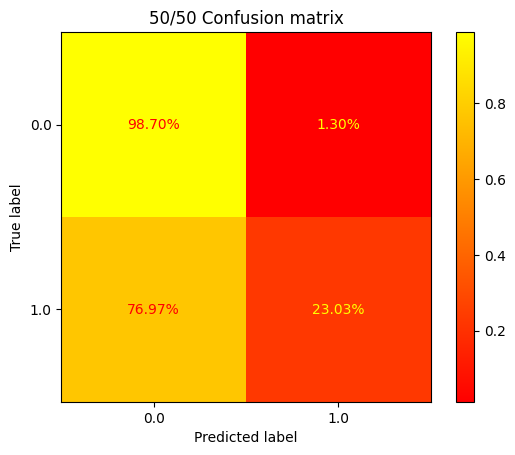

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    success,
    fail,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'autumn',
    )
plt.grid(False)
plt.title('50/50 Confusion matrix') ;

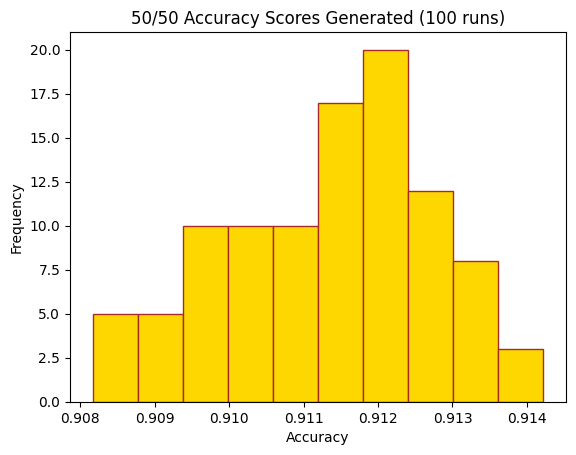

In [ ]:
plt.hist(accuracy_scores, bins=10, color='gold', edgecolor='brown') ;
plt.title('50/50 Accuracy Scores Generated (100 runs)') ;
plt.xlabel('Accuracy') ;
plt.ylabel('Frequency') ;
plt.show() ;

## Data Visualization

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test, target_pred))
print(classification_report(target_test, target_pred))

[[31986   458]
 [ 2751   805]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     32444
         1.0       0.64      0.23      0.33      3556

    accuracy                           0.91     36000
   macro avg       0.78      0.61      0.64     36000
weighted avg       0.89      0.91      0.89     36000



## Communicate the Results

